# Matrices Solutions

In [8]:
from sympy import *
init_printing()

Use `row_del` and `row_insert` to go from one Matrix to the other.

In [9]:
def matrix1(M):
    """
    >>> M = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    >>> M
    [1, 2, 3]
    [4, 5, 6]
    [7, 8, 9]
    >>> matrix1(M)
    [4, 5, 6]
    [0, 0, 0]
    [7, 8, 9]
    """
    M.row_del(0)
    M = M.row_insert(1, Matrix([[0, 0, 0]]))
    return M

In [10]:
M = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

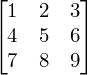

In [11]:
M

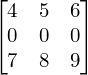

In [12]:
matrix1(M)

## Matrix Constructors

Use the matrix constructors to construct the following matrices.  There may be more than one correct answer.

$$\left[\begin{array}{ccc}4 & 0 & 0\\\\ 
0 & 4 & 0\\\\ 
0 & 0 & 4\end{array}\right]$$

In [13]:
def matrix2():
    """
    >>> matrix2()
    [4, 0, 0]
    [0, 4, 0]
    [0, 0, 4]
    """
    return eye(3)*4
    # OR return diag(4, 4, 4)

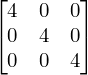

In [7]:
matrix2()

$$\left[\begin{array}{}1 & 1 & 1 & 0\\\\1 & 1 & 1 & 0\\\\0 & 0 & 0 & 1\end{array}\right]$$

In [14]:
def matrix3():
    """
    >>> matrix3()
    [1, 1, 1, 0]
    [1, 1, 1, 0]
    [0, 0, 0, 1]
    """
    return diag(ones(2, 3), 1)
    # OR diag(ones(2, 3), ones(1, 1))

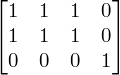

In [15]:
matrix3()

$$\left[\begin{array}{}-1 & -1 & -1 & 0 & 0 & 0\\\\-1 & -1 & -1 & 0 & 0 & 0\\\\-1 & -1 & -1 & 0 & 0 & 0\\\\0 & 0 & 0 & 0 & 0 & 0\\\\0 & 0 & 0 & 0 & 0 & 0\\\\0 & 0 & 0 & 0 & 0 & 0\end{array}\right]$$

In [16]:
def matrix4():
    """
    >>> matrix4()
    [-1, -1, -1, 0, 0, 0]
    [-1, -1, -1, 0, 0, 0]
    [-1, -1, -1, 0, 0, 0]
    [ 0,  0,  0, 0, 0, 0]
    [ 0,  0,  0, 0, 0, 0]
    [ 0,  0,  0, 0, 0, 0]
    """
    return diag(-ones(3, 3), zeros(3, 3))
    # OR diag(-ones(3, 3), 0, 0, 0)

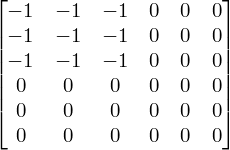

In [17]:
matrix4()

## Advanced Methods

Recall that if $f$ is an analytic function, then we can define $f(M)$ for any square matrix $M$ by "plugging" $M$ into the power series formula for $f(x)$. In other words, if $$f(x) = \sum_{n=0}^\infty a_n x^n,$$ then we define $f(M)$ by $$f(M) = \sum_{n=0}^\infty a_n M^n,$$ where $M^0$ is $I$, the identity matrix. 

Furthermore, if $M$ is a diagonalizable matrix, that is, $M=PDP^{-1}$, where $D$ is diagonal, then $M^n = PD^nP^{-1}$ (because $M^n = \left(PDP^{-1}\right)\left(PDP^{-1}\right)\cdots\left(PDP^{-1}\right)=PD\left(P^{-1}P\right)D\left(P^{-1}P\right)\cdots DP^{-1} = PD^nP^{-1}$).

But if 

$$ D = \begin{bmatrix}
         d_1 & 0 & \cdots & 0 \\\\
         0 & d_2 & \cdots & 0 \\\\
         \vdots & \vdots & \ddots & \vdots \\\\
         0 & 0 & \cdots & d_n
      \end{bmatrix}
$$

is a diagonal matrix, then 

$$ D^n = \begin{bmatrix}
         d_1^n & 0 & \cdots & 0 \\\\
         0 & d_2^n & \cdots & 0 \\\\
         \vdots & \vdots & \ddots & \vdots \\\\
         0 & 0 & \cdots & d_n^n
      \end{bmatrix}
$$

so that 

$$
\sum_{n=0}^\infty a_n M^n = \sum_{n=0}^\infty a_n PD^nP^{-1} = P\cdot\begin{bmatrix}
    \sum_{n=0}^\infty a_n d_1^n & 0 & \cdots & 0 \\\\
         0 & \sum_{n=0}^\infty a_n d_2^n & \cdots & 0 \\\\
         \vdots & \vdots & \ddots & \vdots \\\\
         0 & 0 & \cdots & \sum_{n=0}^\infty a_n d_n^n
\end{bmatrix}\cdot P^{-1} = P\cdot\begin{bmatrix}
    f(d_1) & 0 & \cdots & 0 \\\\
         0 & f(d_2) & \cdots & 0 \\\\
         \vdots & \vdots & \ddots & \vdots \\\\
         0 & 0 & \cdots & f(d_n)
\end{bmatrix}\cdot P^{-1}
$$

Let's create some square matrices, which we will use throughout the exercises.

In [18]:
x = symbols('x')
A = Matrix([[1, 1], [1, 0]])
M = Matrix([[3, 10, -30], [0, 3, 0], [0, 2, -3]])
N = Matrix([[-1, -2, 0, 2], [-1, -1, 2, 1], [0, 0, 2, 0], [-1, -2, 2, 2]])

First, verify that these matrices are indeed diagonalizable.

In [19]:
print(A.is_diagonalizable())
print(M.is_diagonalizable())
print(N.is_diagonalizable())

True
True
True


Now, we want to write a function that computes $f(M)$, for diagonalizable matrix $M$ and analytic function $f$.

However, there is one complication. We can use `diagonalize` to get `P` and `D`, but we need to apply the function to the diagonal of `D`. We might think that we could use `eigenvals` to get the eigenvalues of the matrix, since the diagonal values of `D` are just the eigenvalues of `M`, but the issue is that they could be in any order in `D`.

Instead, we can use matrix slicing to get the diagonal values (or indeed, any value) of a matrix. There is not enough time in this tutorial (or room in this document) to discuss the full details of matrix slicing. For now, we just note that `M[i, j]` returns the element at position `i, j` (which is the `i + 1, j + 1`th element of the matrix, due to Python's 0-indexing). For example

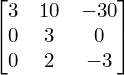

In [20]:
M

In [21]:
M[0, 1]

That should be enough information to write the following function.

In [22]:
def matrix_func(M, func):
    """
    Computes M at func. Assumes that M is square diagonalizable.

    >>> matrix_func(M, exp)
    [exp(3), -5*exp(-3)/3 + 5*exp(3)/3, -5*exp(3) + 5*exp(-3)]
    [     0,                    exp(3),                     0]
    [     0,     -exp(-3)/3 + exp(3)/3,               exp(-3)]

    Note that for the function exp, we can also just use M.exp()

    >>> matrix_func(M, exp) == M.exp()
    True

    But for other functions, we have to do it this way.

    >>> M.sin()
    Traceback (most recent call last):
    ...
    AttributeError: Matrix has no attribute sin.
    >>> matrix_func(N, sin)
    [-sin(1), -2*sin(1),      0, 2*sin(1)]
    [-sin(1),   -sin(1), sin(2),   sin(1)]
    [      0,         0, sin(2),        0]
    [-sin(1), -2*sin(1), sin(2), 2*sin(1)]
    
    Note that we could also use this to compute the series expansion of a matrix, 
    if we know the closed form of that expansion. For example, suppose we wanted to compute
    
    I + M + M**2 + M**3 + …

    The series

    1 + x + x**2 + x**3 + …

    is equal to the function 1/(1 - x).

    >>> matrix_func(M, Lambda(x, 1/(1 - x))) # Note, Lambda works just like lambda, but is symbolic
    [-1/2, -5/4, 15/4]
    [   0, -1/2,    0]
    [   0, -1/4,  1/4]
    """
    P, D = M.diagonalize()
    diags = [func(D[i, i]) for i in range(M.shape[0])]
    return P*diag(*diags)*P**-1

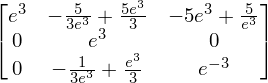

In [23]:
matrix_func(M, exp)

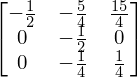

In [24]:
matrix_func(M, Lambda(x, 1/(1 - x)))

Now lets investigate how this works in relation to the series expansion definition. Write a function that uses `matrix_func` and `series` to compute the approximation of a matrix evaluated at a function up to $O(M^n)$.

In [26]:
def matrix_func_series(M, func, n):
    """
    Computes the approximation of the func(M) using the series definition up to O(M**n).

    >>> matrix_func_series(M, exp, 10)
    [22471/1120,  14953/448, -44859/448]
    [         0, 22471/1120,          0]
    [         0, 14953/2240,    83/2240]
    >>> matrix_func_series(M, exp, 10).evalf()
    [20.0633928571429, 33.3772321428571,  -100.131696428571]
    [               0, 20.0633928571429,                  0]
    [               0, 6.67544642857143, 0.0370535714285714]
    >>> matrix_func(M, exp).evalf()
    [20.0855369231877, 33.3929164246997,  -100.178749274099]
    [               0, 20.0855369231877,                  0]
    [               0, 6.67858328493993, 0.0497870683678639]

    It's pretty close. Basically what we might expect for those values up to O(x**10).

    >>> matrix_func_series(N, sin, 3)
    [-1, -2, 0, 2]
    [-1, -1, 2, 1]
    [ 0,  0, 2, 0]
    [-1, -2, 2, 2]
    >>> matrix_func(N, sin).evalf()
    [-0.841470984807897,  -1.68294196961579,                 0,  1.68294196961579]
    [-0.841470984807897, -0.841470984807897, 0.909297426825682, 0.841470984807897]
    [                 0,                  0, 0.909297426825682,                 0]
    [-0.841470984807897,  -1.68294196961579, 0.909297426825682,  1.68294196961579]

    It's not as close, because we used O(x**3), but clearly still the same thing.

    >>> matrix_func_series(M, Lambda(x, 1/(1 - x)), 10)
    [29524, 73810, -221430]
    [    0, 29524,       0]
    [    0, 14762,  -14762]
    >>> matrix_func(M, Lambda(x, 1/(1 - x)))
    [-1/2, -5/4, 15/4]
    [   0, -1/2,    0]
    [   0, -1/4,  1/4]

    Woah! That one's not close at all. What is happening here?  Let's try more terms

    >>> matrix_func_series(M, Lambda(x, 1/(1 - x)), 100)
    [257688760366005665518230564882810636351053761000, 644221900915014163795576412207026590877634402500, -1932665702745042491386729236621079772632903207500]
    [                                               0, 257688760366005665518230564882810636351053761000,                                                  0]
    [                                               0, 128844380183002832759115282441405318175526880500,  -128844380183002832759115282441405318175526880500]
    
    It just keeps getting bigger. In fact, the series diverges. Recall that 
    1/(1 - x) = 1 + x + x**2 + x**3 + … *only if* |x| < 1.  But the eigenvalues 
    of M are bigger than 1 in absolute value.
    
    >>> M.eigenvals()
    {3: 2, -3: 1}

    In fact, 1/(1 - M) is mathematically defined via the analytic continuation 
    of the series expansion 1 + x + x**2 + …, which is just 1/(1 - x).  This is
    well-defined as long as none of the eigenvalues of M are equal to 1.  Let's
    try it on N.

    >>> matrix_func(N, Lambda(x, 1/(1 - x)))
    [nan, -oo, nan,  oo]
    [nan, nan, nan, nan]
    [nan, nan, nan, nan]
    [nan, -oo, nan,  oo]
    
    That didn't work. What are the eigenvalues of N?

    >>> N.eigenvals()
    {1: 1, 2: 1, -1: 1, 0: 1}

    Ah, the first one is 1, so we cannot define 1/(1 - N). 
    """
    x = Dummy('x') # This works even if func already contains Symbol('x')
    series_func = Lambda(x, func(x).series(x, 0, n).removeO())
    return matrix_func(M, series_func)

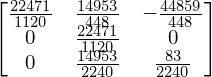

In [27]:
matrix_func_series(M, exp, 10)

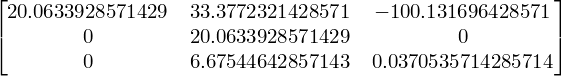

In [28]:
matrix_func_series(M, exp, 10).evalf()

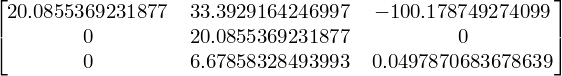

In [29]:
matrix_func(M, exp).evalf()

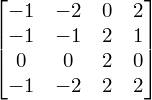

In [30]:
matrix_func_series(N, sin, 3)

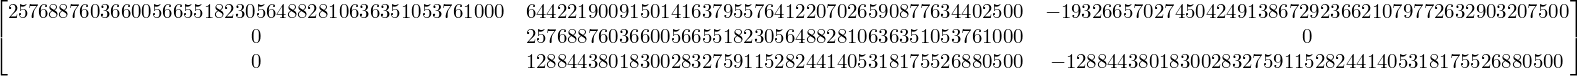

In [31]:
matrix_func_series(M, Lambda(x, 1/(1 - x)), 100)

In [32]:
M.eigenvals()

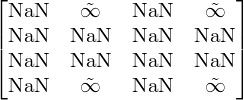

In [33]:
matrix_func(N, Lambda(x, 1/(1 - x)))

In [34]:
N.eigenvals()